In [51]:
from citipy import citipy
from random import randint
import openweathermapy.core as owm
from config import api_key
import matplotlib as plt

In [52]:
def newpoint():
   return randint(-180,180), randint(-1, 4)

coordinates =[]

points = (newpoint() for x in range(100))
for point in points:
   #print (point)
   coordinates.append(point)


In [53]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))


In [54]:
city_names = []

for city in cities:
    country_code = city.country_code
    name = city.city_name
    city_names.append(name)
    #print(f"The country code of {name} is '{country_code}'.")

In [55]:
settings = {"units": "Imperial","APPID" : api_key}

counter = 0
citypy_list = []
for a in city_names:
    try:
        data = owm.get_current(a, **settings)
        citypy_list.append(data)
    except:
        counter += 1

print (counter)

36


In [56]:
print (len(citypy_list))

64


In [57]:
import pprint
pprint.pprint (citypy_list[0])

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.93, 'lon': 18.42},
 'dt': 1522627200,
 'id': 3369157,
 'main': {'humidity': 82,
          'pressure': 1009,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Cape Town',
 'sys': {'country': 'ZA',
         'id': 6529,
         'message': 0.0043,
         'sunrise': 1522645151,
         'sunset': 1522687205,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 9.17}}


In [58]:

latitude = []
humidity = []
wind_speed = []
temperature = []

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

for a in citypy_list:
    latitude.append(a['coord']['lat'])
    humidity.append(a['main']['humidity'])
    wind_speed.append(a['wind']['speed'])
    temperature.append(a['main']['temp'])
    


In [59]:
print (owm.BASE_URL)

http://api.openweathermap.org/data/2.5/


In [60]:
print (latitude)

[-33.93, -34.42, -34.42, -33.93, -34.42, -54.81, 53.7, 60.4, 20.2, 43.11, -33.93, -34.42, 45.89, -54.81, 41.42, 52.48, 36.27, 54.28, -34.42, -54.81, 4.89, -33.21, -34.42, 37.63, 27.87, -33.21, 61.6, -34.42, 20.2, -54.81, 20.2, 60.15, -34.42, -34.42, -34.53, -34.42, 54.28, -34.42, 16.28, 27.87, -34.42, -54.81, 4.92, -26.65, 60.4, -34.42, -34.42, -26.65, 5.35, -34.42, -26.65, -34.42, -54.81, -34.42, -34.42, -34.42, -34.42, -33.93, -34.42, -34.42, -33.93, -54.81, -33.21, -34.42]


In [61]:
print (humidity)

[82, 91, 91, 82, 91, 87, 86, 80, 25, 87, 82, 91, 61, 87, 61, 93, 58, 86, 91, 87, 100, 75, 91, 83, 18, 75, 92, 91, 25, 87, 25, 80, 91, 91, 93, 91, 86, 91, 32, 18, 91, 87, 92, 88, 80, 91, 91, 88, 79, 91, 88, 91, 87, 91, 91, 91, 91, 82, 91, 91, 82, 87, 75, 91]


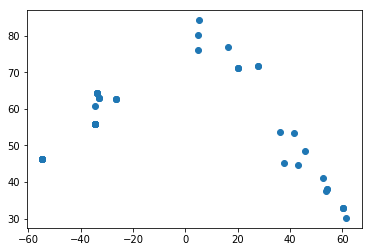

In [67]:
import matplotlib.pyplot as plt
plt.scatter(latitude, temperature)
plt.show()